In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit
from scipy.stats import randint
import random

from modelling_functions import *

#import warnings
#warnings.simplefilter(action="ignore")

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [2]:
# Import the dataset
data = pd.read_csv("../datasets/data_features.csv")

In [3]:
# Check the data
data.head()

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
1,2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2,2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
3,2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
4,2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [4]:
# Check the shape of the data
data.shape

(257, 25)

In [5]:
# Look at the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       257 non-null    object 
 1   dengue_cases               257 non-null    int64  
 2   denv_1                     256 non-null    float64
 3   denv_2                     256 non-null    float64
 4   denv_3                     256 non-null    float64
 5   denv_4                     256 non-null    float64
 6   Mean Temperature (°C)      256 non-null    float64
 7   Mean Wind Speed (km/h)     256 non-null    float64
 8   Daily Rainfall Total (mm)  256 non-null    float64
 9   Maximum Temperature (°C)   256 non-null    float64
 10  Max Wind Speed (km/h)      256 non-null    float64
 11  Minimum Temperature (°C)   256 non-null    float64
 12  google_trends              256 non-null    float64
 13  s_ratio                    257 non-null    float64

### Date Processing

The date feature is currently an object time. We will be converting it into a dateTime format.

In [6]:
# Convert the date column into dateTime format
data['time'] = pd.to_datetime(data['time'])

In [7]:
# Set the time as the index
data = data.set_index('time')

In [8]:
# Check the data 
data.head()

,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
time,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [9]:
# set frequency of data
data = data.asfreq('W-SUN')

# remove first row
data = data[1:]

In [10]:
# drop unnecessary rows
data.drop(columns=['denv_1', 'denv_2', 'denv_3', 'denv_4'
                   #'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
                   #'Maximum Temperature (°C)', 'Max Wind Speed (km/h)'
                  ],
          inplace=True
         )

In [11]:
# subset data to remove 2023 data which will be used for verification later
data_subset = data.loc[data.index.year <= 2022, :]

### Train/Test Split

Given that this is a time series, we do a 30% train test split by time
* Train: ~75% of data - 2018 to 2021
* Test: ~25% of data - 2022 to 2023

In [13]:
# with 257 datapoints, the 195th data point is the end of 2018 and coincides with 75th percentile of datapoints by time
195/257

0.7587548638132295

In [19]:
train, test = train_test_split(data)

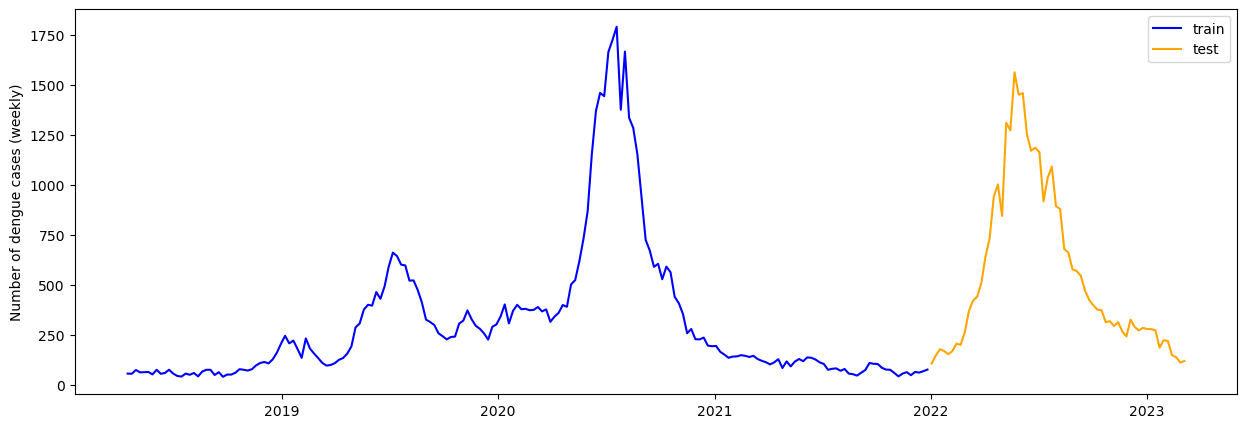

In [20]:
train_test_plot(train, test)

## Random Forest Regression on Time Series

#### Tuning Variables to be Included

In [227]:
# try adding predictors one by one and see which ones gives better predictive power
# predictors are arranged in order of what we think predicts best to worse
vars_to_try = [
    'google_trends',
    'Minimum Temperature (°C)', 'Daily Rainfall Total (mm)',
    'Mean Temperature (°C)', 'Maximum Temperature (°C)',
    'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)',
    's_ratio'
]

In [228]:
# create empty dictionary
overall_results = dict()

for i in range(1, len(vars_to_try)+1):
    # iteratively add on each predictor to test default rf model
    vars_to_try_full = vars_to_try[:i].copy()
    vars_to_try_full.append('dengue_cases')
    
    # fit model and get metrics for selected predictors
    overall_results[vars_to_try[i-1]] = test_rf_model(data.loc[data.index.year <= 2022, vars_to_try_full], 
                                                      test_year=2022, vars_lag=vars_to_try[:i], 
                                                      num_lag=4, rf_params=rf_params)
    print(f'Completed model fitting with {i} variables')
    
# convert metrics into dataframe for easier plotting
overall_results = (pd.DataFrame.from_dict(overall_results)).T

Completed model fitting with 1 variables
Completed model fitting with 2 variables
Completed model fitting with 3 variables
Completed model fitting with 4 variables
Completed model fitting with 5 variables
Completed model fitting with 6 variables
Completed model fitting with 7 variables
Completed model fitting with 8 variables


<Axes: title={'center': 'RMSE vs Cumulative Variables'}>

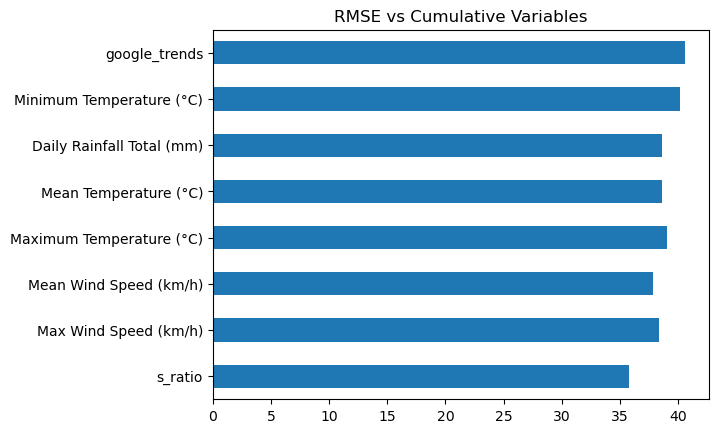

In [229]:
# plot test RMSE to observe if additional variables improve the RMSE
overall_results.reindex(overall_results.index[::-1])['rmse_train'].plot(kind='barh', title='RMSE vs Cumulative Variables')


Observations:

- Variables that provide good predictive power should lower the RMSE, hence we find variables that reduce the RMSE upon being added
- These variables are
    - `google_trends`
    - `Minimum Temperature (°C)`
    - `Daily Rainfall Total (mm)`
    - `Mean Wind Speed (km/h)`
    - `s_ratio`
- We will use these variables and the month dummies created previously

#### Tuning of Number of Lags

In [16]:
vars_to_try = [
    'google_trends',
    'Minimum Temperature (°C)', 'Daily Rainfall Total (mm)',
    'Mean Wind Speed (km/h)',
    's_ratio'
]

vars_to_try_full = vars_to_try.copy()
vars_to_try_full += [var for var in data.columns if 'month' in var] # inserting month variables into predictor list
vars_to_try_full.append('dengue_cases')

In [253]:
%%time
# create empty dictionary
overall_results = dict()

for i in range(0, 53): # try up to 52 weeks of lags
    
    # fit model and get metrics for selected predictors
    overall_results[i] = test_rf_model(data.loc[data.index.year <= 2022, vars_to_try_full], 
                                                test_year=2022, vars_lag=vars_to_try, 
                                                num_lag=i, rf_params=rf_params)
    print(f'Completed model fitting with {i} lags')
    
# convert metrics into dataframe for easier plotting
overall_results = (pd.DataFrame.from_dict(overall_results)).T

Completed model fitting with 0 lags
Completed model fitting with 1 lags
Completed model fitting with 2 lags
Completed model fitting with 3 lags
Completed model fitting with 4 lags
Completed model fitting with 5 lags
Completed model fitting with 6 lags
Completed model fitting with 7 lags
Completed model fitting with 8 lags
Completed model fitting with 9 lags
Completed model fitting with 10 lags
Completed model fitting with 11 lags
Completed model fitting with 12 lags
Completed model fitting with 13 lags
Completed model fitting with 14 lags
Completed model fitting with 15 lags
Completed model fitting with 16 lags
Completed model fitting with 17 lags
Completed model fitting with 18 lags
Completed model fitting with 19 lags
Completed model fitting with 20 lags
Completed model fitting with 21 lags
Completed model fitting with 22 lags
Completed model fitting with 23 lags
Completed model fitting with 24 lags
Completed model fitting with 25 lags
Completed model fitting with 26 lags
Completed m

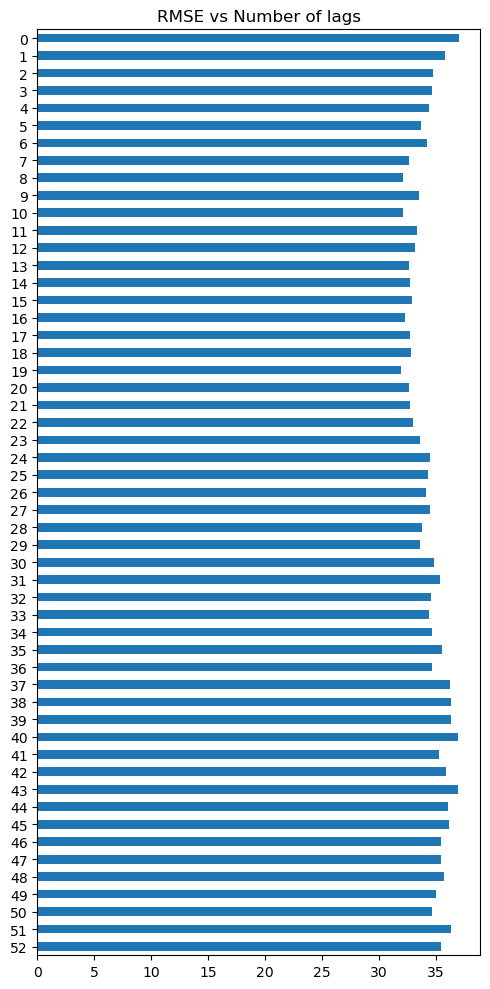

In [254]:
# plot test RMSE to observe if additional variables improve the RMSE
plt.figure(figsize=(5,10))
overall_results.reindex(overall_results.index[::-1])['rmse_train'].plot(kind='barh', title='RMSE vs Number of lags')

plt.tight_layout()

In [255]:
overall_results['rmse_train'].sort_values().head(10)

19    31.967094
10    32.102407
8     32.112577
16    32.324622
13    32.615832
20    32.653635
7     32.685014
17    32.727550
14    32.738831
21    32.765299
Name: rmse_train, dtype: float64

In [256]:
overall_results['rmse_test'].sort_values().head(10)

5    251.899540
3    251.975144
2    252.303405
4    252.911994
1    255.099159
6    256.637749
7    260.587182
8    266.845252
0    270.039375
9    275.214673
Name: rmse_test, dtype: float64

Observations:

- Lag of 7 weeks performs well in both the train and test RMSE

#### Tuning Hyperparameters

In [12]:
# reload list of variables
vars_to_try = [
    'google_trends',
    'Minimum Temperature (°C)', 
    'Daily Rainfall Total (mm)',
    'Mean Wind Speed (km/h)',
    's_ratio'
]

vars_to_try_full = vars_to_try.copy()
vars_to_try_full += [var for var in data.columns if 'month' in var] # inserting month variables into predictor list
vars_to_try_full.append('dengue_cases')

In [13]:
# set best number of lags
num_lags = 7

In [14]:
rf_params = {
    'n_estimators':1000, 
    'random_state':42
}

In [15]:
results = test_rf_model(data_subset[vars_to_try_full], test_year=2022,
                        vars_lag=vars_to_try, num_lag=num_lags,
                        rf_params=rf_params
                       )

In [18]:
results['rmse_test']

260.5871817571144

In [16]:
train, test = train_test_split(data_subset)

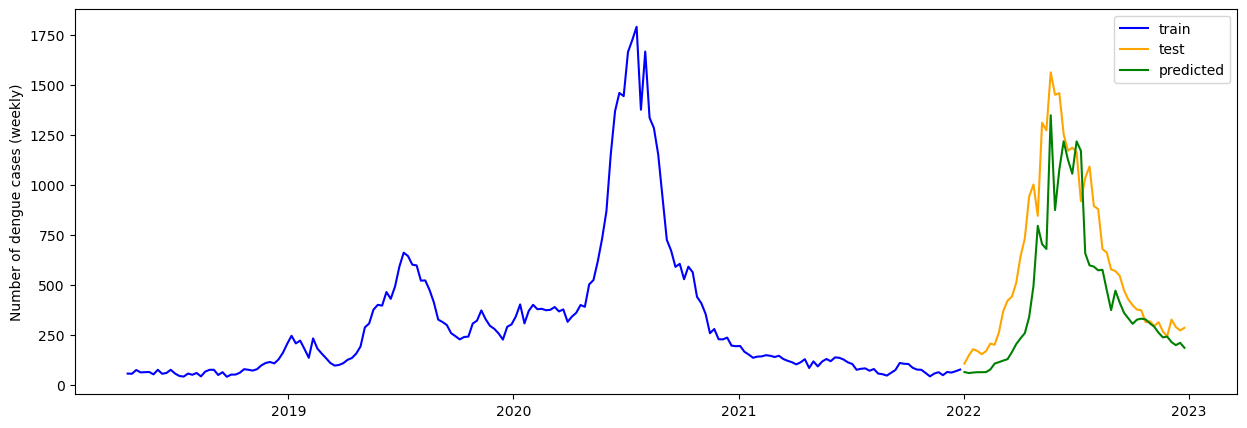

In [17]:
train_test_plot(train, test, results['preds_test'])

In [28]:
# Evaluation of the model
error = round(mean_squared_error(test['dengue_cases'], preds, squared=False), 0)
print(f'Minimum Dengue Cases: {round(data["dengue_cases"].min(),0)}')
print(f'Maximum Dengue Cases: {round(data["dengue_cases"].max(),0)}')

print(f'RMSE: {error}')
print(f'RMSE relative to minimum values in dengue cases: {round(error / data["dengue_cases"].min(),0)}.')
print(f'RMSE relative to maximum values in dengue cases: {round(error / data["dengue_cases"].max(),0)}.')

Minimum Dengue Cases: 40
Maximum Dengue Cases: 1791
RMSE: 272.0
RMSE relative to minimum values in dengue cases: 7.0.
RMSE relative to maximum values in dengue cases: 0.0.
